<a href="https://colab.research.google.com/github/alexrafkin/ideal-parakeet/blob/main/DataExplorationII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

sp = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [ ]:
sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?

In [ ]:
sp['total score'] = sp['math score'] + sp['reading score'] + sp['writing score']

In [ ]:
import seaborn as sns

In [ ]:
sp.groupby("race/ethnicity").mean()

,math score,reading score,writing score,total score
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,188.977528
group B,63.452632,67.352632,65.600000,196.405263
group C,64.463950,69.103448,67.827586,201.394984
group D,67.362595,70.030534,70.145038,207.538168
group E,73.821429,73.028571,71.407143,218.257143


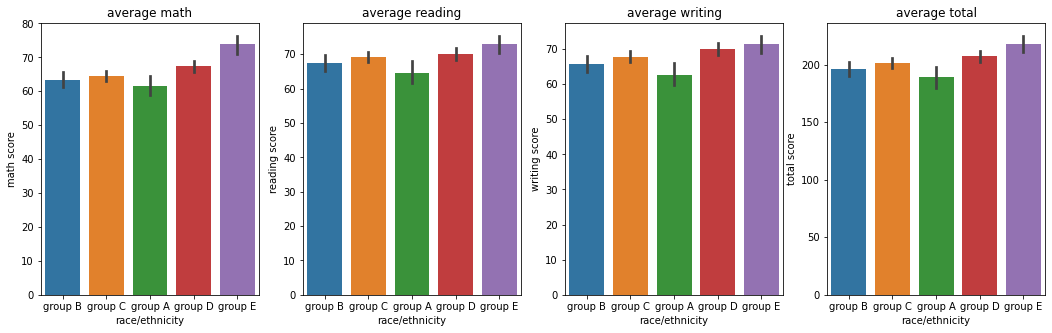

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.barplot(sp["race/ethnicity"], sp["math score"])
plt.title("average math")

plt.subplot(1,4,2)
sns.barplot(sp["race/ethnicity"], sp["reading score"])
plt.title("average reading")

plt.subplot(1,4,3)
sns.barplot(sp["race/ethnicity"], sp["writing score"])
plt.title("average writing")

plt.subplot(1,4,4)
sns.barplot(sp["race/ethnicity"], sp["total score"])
plt.title("average total")

plt.show()

Looks like group E does the best on avg, and group A does the worst.

In [ ]:
import math
from termcolor import colored

In [ ]:
# Test whether group differences are significant
racegroups = sp["race/ethnicity"].unique()
racegrouped_df = sp.groupby("race/ethnicity")
for var in ["math score", "writing score", "reading score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(racegroups)):
        for j in range(i+1, len(racegroups)):
            print("t-test between groups {0} and {1}:".format(racegroups[i], racegroups[j]))
            if stats.ttest_ind(sp[sp["race/ethnicity"]==racegroups[i]][var], sp[sp["race/ethnicity"]==racegroups[j]][var])[1]<0.05:
              print(colored(stats.ttest_ind(
                sp[sp["race/ethnicity"]==racegroups[i]][var], 
                sp[sp["race/ethnicity"]==racegroups[j]][var]
                ), 'green'))
            else:
              print(stats.ttest_ind(sp[sp["race/ethnicity"]==racegroups[i]][var], sp[sp["race/ethnicity"]==racegroups[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


We can see the significant differences highlighted in green.

In [ ]:
sp.groupby("gender").mean()

,math score,reading score,writing score,total score
gender,,,,
female,63.633205,72.608108,72.467181,208.708494
male,68.728216,65.473029,63.311203,197.512448


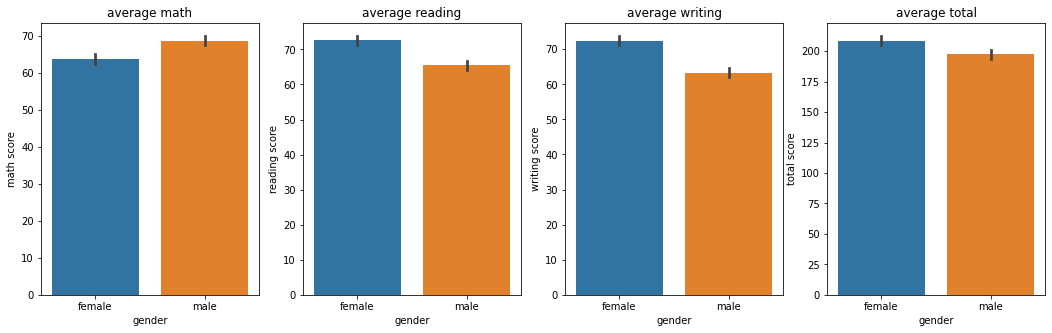

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.barplot(sp["gender"], sp["math score"])
plt.title("average math")

plt.subplot(1,4,2)
sns.barplot(sp["gender"], sp["reading score"])
plt.title("average reading")

plt.subplot(1,4,3)
sns.barplot(sp["gender"], sp["writing score"])
plt.title("average writing")

plt.subplot(1,4,4)
sns.barplot(sp["gender"], sp["total score"])
plt.title("average total")

plt.show()

Looks like males tend to do better in math, while females tend to do better in reading, writing, and total.

In [ ]:
# Test whether group differences are significant
gendergroups = sp["gender"].unique()
gendergrouped_df = sp.groupby("gender")
for var in ["math score", "writing score", "reading score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(gendergroups)):
        for j in range(i+1, len(gendergroups)):
            print("t-test between groups {0} and {1}:".format(gendergroups[i], gendergroups[j]))
            if stats.ttest_ind(sp[sp["gender"]==gendergroups[i]][var], sp[sp["gender"]==gendergroups[j]][var])[1]<0.05:
              print(colored(stats.ttest_ind(
                sp[sp["gender"]==gendergroups[i]][var], 
                sp[sp["gender"]==gendergroups[j]][var]
                ), 'green'))
            else:
              print(stats.ttest_ind(sp[sp["gender"]==gendergroups[i]][var], sp[sp["gender"]==gendergroups[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)


In [ ]:
All are significant differences.

In [ ]:
sp.groupby("parental level of education").mean()

,math score,reading score,writing score,total score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207
bachelor's degree,69.389831,73.000000,73.381356,215.771186
high school,62.137755,64.704082,62.448980,189.290816
master's degree,69.745763,75.372881,75.677966,220.796610
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022


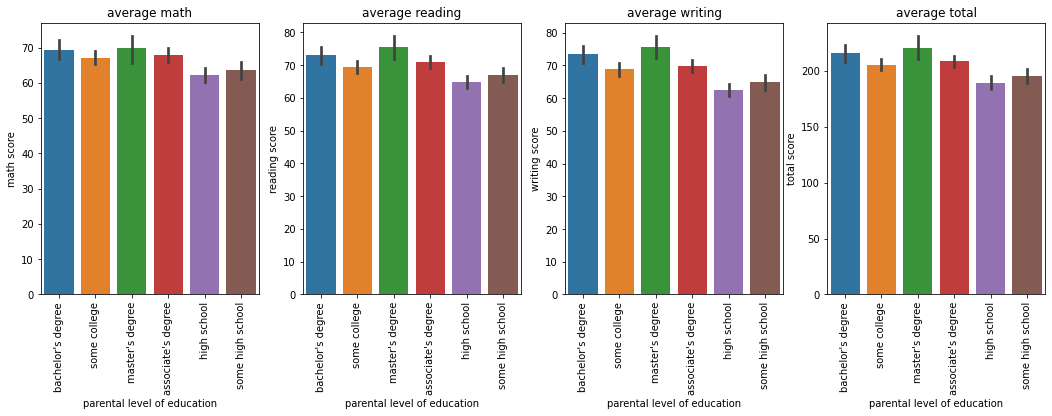

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.barplot(sp["parental level of education"], sp["math score"])
plt.title("average math")
plt.xticks(rotation=90)

plt.subplot(1,4,2)
sns.barplot(sp["parental level of education"], sp["reading score"])
plt.title("average reading")
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.barplot(sp["parental level of education"], sp["writing score"])
plt.title("average writing")
plt.xticks(rotation=90)

plt.subplot(1,4,4)
sns.barplot(sp["parental level of education"], sp["total score"])
plt.title("average total")
plt.xticks(rotation=90)

plt.show()

Looks like masters degree does the best on avg, and high school does the worst.

In [ ]:
# Test whether group differences are significant
parentgroups = sp["parental level of education"].unique()
parentgrouped_df = sp.groupby("parental level of education")
for var in ["math score", "writing score", "reading score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parentgroups)):
        for j in range(i+1, len(parentgroups)):
            print("t-test between groups {0} and {1}:".format(parentgroups[i], parentgroups[j]))
            if stats.ttest_ind(sp[sp["parental level of education"]==parentgroups[i]][var], sp[sp["parental level of education"]==parentgroups[j]][var])[1]<0.05:
              print(colored(stats.ttest_ind(
                sp[sp["parental level of education"]==parentgroups[i]][var], 
                sp[sp["parental level of education"]==parentgroups[j]][var]
                ), 'green'))
            else:
              print(stats.ttest_ind(sp[sp["parental level of education"]==parentgroups[i]][var], sp[sp["parental level of education"]==parentgroups[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

Again, sig differences in green.

2. Are there any differences between the lunch types with respect to student performances in exams? If there are, how do you explain this?

In [ ]:
sp.groupby("lunch").mean()

,math score,reading score,writing score,total score
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183
standard,70.034109,71.654264,70.823256,212.511628


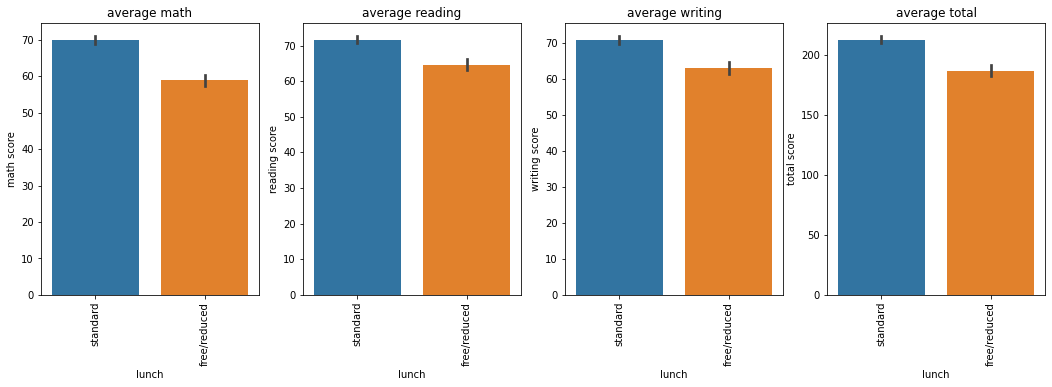

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.barplot(sp["lunch"], sp["math score"])
plt.title("average math")
plt.xticks(rotation=90)

plt.subplot(1,4,2)
sns.barplot(sp["lunch"], sp["reading score"])
plt.title("average reading")
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.barplot(sp["lunch"], sp["writing score"])
plt.title("average writing")
plt.xticks(rotation=90)

plt.subplot(1,4,4)
sns.barplot(sp["lunch"], sp["total score"])
plt.title("average total")
plt.xticks(rotation=90)

plt.show()

Looks like standard lunch  does the best on avg across the board.

In [ ]:
# Test whether group differences are significant
lunchgroups = sp["lunch"].unique()
lunchgrouped_df = sp.groupby("lunch")
for var in ["math score", "writing score", "reading score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(lunchgroups)):
        for j in range(i+1, len(lunchgroups)):
            print("t-test between groups {0} and {1}:".format(lunchgroups[i], lunchgroups[j]))
            if stats.ttest_ind(sp[sp["lunch"]==lunchgroups[i]][var], sp[sp["lunch"]==lunchgroups[j]][var])[1]<0.05:
              print(colored(stats.ttest_ind(
                sp[sp["lunch"]==lunchgroups[i]][var], 
                sp[sp["lunch"]==lunchgroups[j]][var]
                ), 'green'))
            else:
              print(stats.ttest_ind(sp[sp["lunch"]==lunchgroups[i]][var], sp[sp["lunch"]==lunchgroups[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)


All differences are significant - likely due to wealthier children having significantly more opportunities to excel academically - with private tutors, more home financial stability, etc.

3. Does the test preparation course seem to have an effect on the exam performances?


In [ ]:
sp.groupby("test preparation course").mean()

,math score,reading score,writing score,total score
test preparation course,,,,
completed,69.695531,73.893855,74.418994,218.008380
none,64.077882,66.534268,64.504673,195.116822


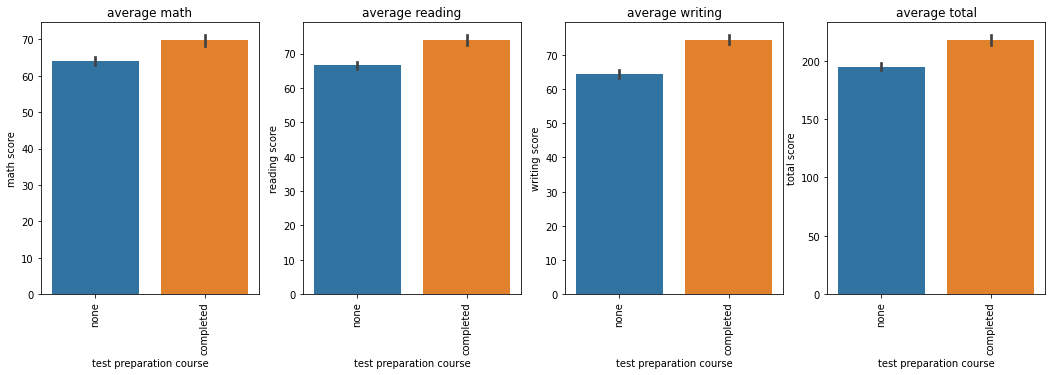

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
sns.barplot(sp["test preparation course"], sp["math score"])
plt.title("average math")
plt.xticks(rotation=90)

plt.subplot(1,4,2)
sns.barplot(sp["test preparation course"], sp["reading score"])
plt.title("average reading")
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.barplot(sp["test preparation course"], sp["writing score"])
plt.title("average writing")
plt.xticks(rotation=90)

plt.subplot(1,4,4)
sns.barplot(sp["test preparation course"], sp["total score"])
plt.title("average total")
plt.xticks(rotation=90)

plt.show()

Looks like prep course does the best on avg across the board.

In [ ]:
# Test whether group differences are significant
prepgroups = sp["test preparation course"].unique()
prepgrouped_df = sp.groupby("lunch")
for var in ["math score", "writing score", "reading score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(prepgroups)):
        for j in range(i+1, len(lunchgroups)):
            print("t-test between groups {0} and {1}:".format(prepgroups[i], prepgroups[j]))
            if stats.ttest_ind(sp[sp["test preparation course"]==prepgroups[i]][var], sp[sp["test preparation course"]==prepgroups[j]][var])[1]<0.05:
              print(colored(stats.ttest_ind(
                sp[sp["test preparation course"]==prepgroups[i]][var], 
                sp[sp["test preparation course"]==prepgroups[j]][var]
                ), 'green'))
            else:
              print(stats.ttest_ind(sp[sp["test preparation course"]==prepgroups[i]][var], sp[sp["test preparation course"]==prepgroups[j]][var]))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)


All differences are significant.

4. Which two exam scores are most correlated with each other?

In [ ]:
sp.corr()

,math score,reading score,writing score,total score
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total score,0.918746,0.970331,0.965667,1.000000


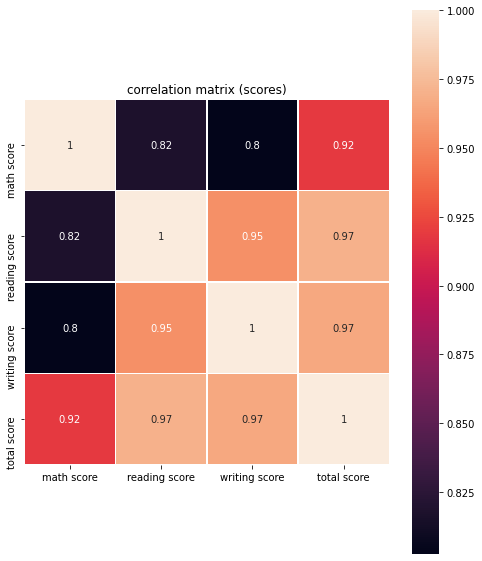

In [ ]:
corrmat_sp = sp.corr()
plt.figure(figsize=(18,10))

plt.subplot(1,2,2)
# Draw the heat map using seaborn
sns.heatmap(corrmat_sp, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (scores)")

plt.show()

Not including the total score, the highest correlated scores are writing and reading, which make sense because they are taught together.